In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
                                        cross_val_predict, cross_val_score

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import utils

import warnings
warnings.filterwarnings('ignore')

## Load data

### Iris

In [65]:
ds_name = 'Iris'
out_path = '../out_boost/out_iris/'
iris = pd.read_csv("../data/iris.data", sep=",")
iris_X = iris.drop(columns=['Class']).to_numpy()
iris_y = iris['Class'].to_numpy()
#utils.plot_dataset(iris, 'Class')

#print("=== Before pre-process ===")
#utils.describe(ireis_X)

data_X = utils.normalize(iris_X)
#data_X = iris_X
data_y = iris_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Glass

In [41]:
ds_name = 'Glass'
out_path = '../out_boost/out_glass/'
glass = pd.read_csv("../data/glass.data", sep=",").drop(columns=['Id'])
glass_X = glass.drop(columns=['Class']).to_numpy()
glass_y = glass['Class'].to_numpy()
#plot_dataset(glass, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(glass_X)

data_X = utils.normalize(glass_X)
#data_X = glass_X
data_y = glass_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Wine

In [55]:
ds_name = 'Wine'
out_path = '../out_boost/out_wine/'
wine = pd.read_csv("../data/wine.data", sep=",")
wine_X = wine.drop(columns=['Class']).to_numpy()
wine_y = wine['Class'].to_numpy()
#utils.plot_dataset(wine, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(wine_X)

data_X = utils.normalize(wine_X)
#data_X = wine_X
data_y = wine_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

### Seeds

In [59]:
ds_name = 'Seeds'
out_path = '../out_boost/out_seeds/'
seeds = pd.read_csv("../data/seeds_dataset.txt", sep="\t")
seeds_X = seeds.drop(columns=['Class']).to_numpy()
seeds_y = seeds['Class'].to_numpy()
#utils.plot_dataset(seeds, attr='Class')

#print("=== Before pre-process ===")
#utils.describe(seeds_X)

data_X = utils.normalize(seeds_X)
#data_X = seeds_X
data_y = seeds_y

#print("\n=== After pre-process ===")
#utils.describe(data_X)

## AdaBoost Classifier

In [60]:
def boost_for_estimators_nb(X, y, folds, est_list):
    y_preds = {}
    for estimators in est_list:
        classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=estimators)
        y_pred = cross_val_predict(classifier, X, y, cv=folds)
        y_preds[estimators] = y_pred
    return y_preds

In [61]:
def boost_for_params(X, y, classifier, folds):
    y_pred = cross_val_predict(classifier, X, y, cv=folds)
    return y_pred

## Experiments

### FSC for different number of estimators

In [62]:
fold_nums = [2, 5, 10]
est_list = [1, 5, 9, 25, 49, 75, 99]
show_plots = False
tex = True # if False - readable info

=== K-Fold ===
K = 2
   1 & 0.22 & 0.065 & 0.103 & 0.08 \\
   5 & 0.206 & 0.058 & 0.096 & 0.073 \\
   9 & 0.229 & 0.062 & 0.107 & 0.079 \\
   25 & 0.243 & 0.069 & 0.114 & 0.086 \\
   49 & 0.201 & 0.057 & 0.094 & 0.071 \\
   75 & 0.248 & 0.07 & 0.116 & 0.087 \\
   99 & 0.178 & 0.053 & 0.083 & 0.065 \\
K = 5
   1 & 0.238 & 0.132 & 0.178 & 0.142 \\
   5 & 0.243 & 0.129 & 0.191 & 0.143 \\
   9 & 0.243 & 0.13 & 0.18 & 0.14 \\
   25 & 0.234 & 0.124 & 0.186 & 0.139 \\
   49 & 0.234 & 0.13 & 0.176 & 0.14 \\
   75 & 0.234 & 0.129 & 0.186 & 0.142 \\
   99 & 0.229 & 0.128 & 0.184 & 0.139 \\
K = 10
   1 & 0.435 & 0.351 & 0.364 & 0.356 \\
   5 & 0.453 & 0.36 & 0.373 & 0.366 \\
   9 & 0.453 & 0.364 & 0.373 & 0.368 \\
   25 & 0.421 & 0.34 & 0.357 & 0.348 \\
   49 & 0.444 & 0.359 & 0.369 & 0.363 \\
   75 & 0.449 & 0.357 & 0.371 & 0.363 \\
   99 & 0.463 & 0.37 & 0.378 & 0.373 \\


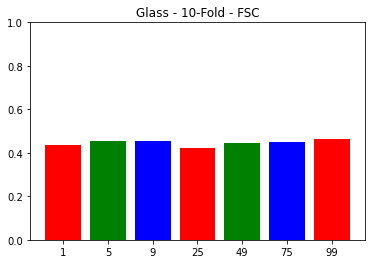

In [45]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = boost_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('&', fscrs[ests], '\\\\')
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   1 & 0.876 & 0.878 & 0.876 & 0.877 \\
   5 & 0.876 & 0.876 & 0.876 & 0.876 \\
   9 & 0.886 & 0.886 & 0.886 & 0.886 \\
   25 & 0.895 & 0.894 & 0.895 & 0.894 \\
   49 & 0.862 & 0.863 & 0.862 & 0.862 \\
   75 & 0.9 & 0.899 & 0.9 & 0.899 \\
   99 & 0.9 & 0.899 & 0.9 & 0.899 \\
K = 5
   1 & 0.905 & 0.906 & 0.905 & 0.905 \\
   5 & 0.919 & 0.92 & 0.919 & 0.919 \\
   9 & 0.9 & 0.899 & 0.9 & 0.899 \\
   25 & 0.919 & 0.919 & 0.919 & 0.919 \\
   49 & 0.89 & 0.89 & 0.89 & 0.889 \\
   75 & 0.9 & 0.899 & 0.9 & 0.899 \\
   99 & 0.91 & 0.909 & 0.91 & 0.908 \\
K = 10
   1 & 0.905 & 0.904 & 0.905 & 0.904 \\
   5 & 0.89 & 0.89 & 0.89 & 0.89 \\
   9 & 0.848 & 0.847 & 0.848 & 0.847 \\
   25 & 0.881 & 0.88 & 0.881 & 0.879 \\
   49 & 0.895 & 0.895 & 0.895 & 0.895 \\
   75 & 0.867 & 0.865 & 0.867 & 0.865 \\
   99 & 0.862 & 0.861 & 0.862 & 0.862 \\


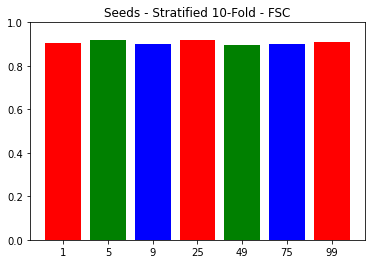

In [75]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    y_preds = boost_for_estimators_nb(data_X, data_y, folds, est_list)
    print('K =', fold_num)
    for ests in est_list:
        accs[ests] = utils.get_accuracy(data_y, y_preds[ests])
        precs[ests] = utils.get_precision(data_y, y_preds[ests])
        recs[ests] = utils.get_recall(data_y, y_preds[ests])
        fscrs[ests] = utils.get_FSC(data_y, y_preds[ests])
        
        if tex:
            # to .tex table
            print('  ', ests, '&', accs[ests], '&', precs[ests], \
                  '&', recs[ests], '&', fscrs[ests], '\\\\')
            #print('&', fscrs[ests], '\\\\')
        else:
            print('\tNnum of estimators =', ests, 'FSC =', fscrs[ests])

    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='estims', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='estims', show=show_plots, save=True)

### FSC for different learning rates

In [64]:
fold_nums = [2, 5, 10]
learning_rate_list = [0.0001, 0.001, 0.01, 0.1, 1]
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   0.0001 & 0.229 & 0.062 & 0.107 & 0.079 \\
   0.001 & 0.248 & 0.07 & 0.116 & 0.087 \\
   0.01 & 0.192 & 0.06 & 0.09 & 0.072 \\
   0.1 & 0.243 & 0.069 & 0.114 & 0.086 \\
   1 & 0.238 & 0.063 & 0.112 & 0.081 \\
K = 5
   0.0001 & 0.252 & 0.14 & 0.185 & 0.148 \\
   0.001 & 0.234 & 0.129 & 0.186 & 0.141 \\
   0.01 & 0.238 & 0.13 & 0.178 & 0.14 \\
   0.1 & 0.248 & 0.134 & 0.193 & 0.148 \\
   1 & 0.243 & 0.135 & 0.18 & 0.145 \\
K = 10
   0.0001 & 0.435 & 0.352 & 0.364 & 0.357 \\
   0.001 & 0.453 & 0.36 & 0.373 & 0.366 \\
   0.01 & 0.458 & 0.363 & 0.375 & 0.369 \\
   0.1 & 0.449 & 0.358 & 0.371 & 0.363 \\
   1 & 0.467 & 0.37 & 0.38 & 0.373 \\


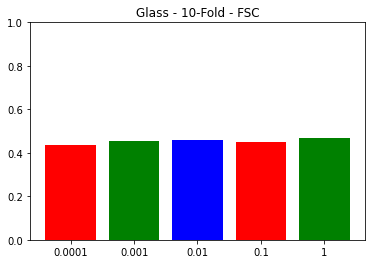

In [48]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for learning_rate in learning_rate_list:
        classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=learning_rate)
        y_pred = boost_for_params(data_X, data_y, classifier, folds)
        
        accs[learning_rate] = utils.get_accuracy(data_y, y_pred)
        precs[learning_rate] = utils.get_precision(data_y, y_pred)
        recs[learning_rate] = utils.get_recall(data_y, y_pred)
        fscrs[learning_rate] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', learning_rate, '&', accs[learning_rate], '&', precs[learning_rate], \
                  '&', recs[learning_rate], '&', fscrs[learning_rate], '\\\\')
            #print('  ', learning_rate, '&', fscrs[learning_rate], '\\\\')
        else:
            print('\tLearning rate =', learning_rate, 'FSC =', fscrs[learning_rate])

    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='learning_rate', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   0.0001 & 0.89 & 0.889 & 0.89 & 0.89 \\
   0.001 & 0.895 & 0.894 & 0.895 & 0.894 \\
   0.01 & 0.895 & 0.894 & 0.895 & 0.894 \\
   0.1 & 0.9 & 0.899 & 0.9 & 0.899 \\
   1 & 0.89 & 0.891 & 0.89 & 0.89 \\
K = 5
   0.0001 & 0.905 & 0.904 & 0.905 & 0.904 \\
   0.001 & 0.9 & 0.899 & 0.9 & 0.899 \\
   0.01 & 0.867 & 0.865 & 0.867 & 0.866 \\
   0.1 & 0.905 & 0.904 & 0.905 & 0.904 \\
   1 & 0.886 & 0.885 & 0.886 & 0.885 \\
K = 10
   0.0001 & 0.886 & 0.885 & 0.886 & 0.884 \\
   0.001 & 0.89 & 0.891 & 0.89 & 0.888 \\
   0.01 & 0.871 & 0.87 & 0.871 & 0.87 \\
   0.1 & 0.867 & 0.865 & 0.867 & 0.865 \\
   1 & 0.905 & 0.905 & 0.905 & 0.903 \\


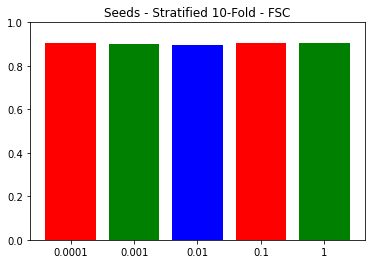

In [65]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for learning_rate in learning_rate_list:
        classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=learning_rate)
        y_pred = boost_for_params(data_X, data_y, classifier, folds)
        
        accs[learning_rate] = utils.get_accuracy(data_y, y_pred)
        precs[learning_rate] = utils.get_precision(data_y, y_pred)
        recs[learning_rate] = utils.get_recall(data_y, y_pred)
        fscrs[learning_rate] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', learning_rate, '&', accs[learning_rate], '&', precs[learning_rate], \
                  '&', recs[learning_rate], '&', fscrs[learning_rate], '\\\\')
            #print('  ', learning_rate, '&', fscrs[learning_rate], '\\\\')
        else:
            print('\tLearning rate =', learning_rate, 'FSC =', fscrs[learning_rate])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='learning_rate', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='learning_rate', show=show_plots, save=True)

### FSC for different boosting algorithms

In [66]:
fold_nums = [2, 5, 10]
algorithms = ['SAMME', 'SAMME.R']
show_plots = False
#tex = False # if False - readable info

=== K-Fold ===
K = 2
   SAMME & 0.215 & 0.064 & 0.101 & 0.079 \\
   SAMME.R & 0.215 & 0.064 & 0.101 & 0.079 \\
K = 5
   SAMME & 0.229 & 0.121 & 0.173 & 0.134 \\
   SAMME.R & 0.21 & 0.119 & 0.165 & 0.129 \\
K = 10
   SAMME & 0.467 & 0.371 & 0.38 & 0.374 \\
   SAMME.R & 0.458 & 0.36 & 0.376 & 0.367 \\


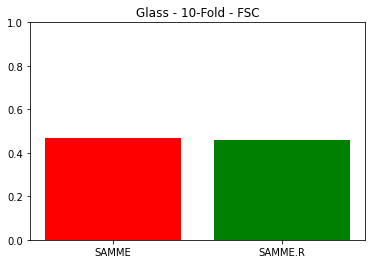

In [51]:
print("=== K-Fold ===")
cross_validator = KFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for algorithm in algorithms:
        classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), algorithm=algorithm)
        y_pred = boost_for_params(data_X, data_y, classifier, folds)
        
        accs[algorithm] = utils.get_accuracy(data_y, y_pred)
        precs[algorithm] = utils.get_precision(data_y, y_pred)
        recs[algorithm] = utils.get_recall(data_y, y_pred)
        fscrs[algorithm] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', algorithm, '&', accs[algorithm], '&', precs[algorithm], \
                  '&', recs[algorithm], '&', fscrs[algorithm], '\\\\')
            #print('  ', algorithm, '&', fscrs[algorithm], '\\\\')
        else:
            print('\tAlgorithm =', algorithm, 'FSC =', fscrs[algorithm])
        
    utils.bar_plot('{} - {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='algorithm', show=show_plots, save=True)

=== Stratified K-Fold ===
K = 2
   SAMME & 0.91 & 0.91 & 0.91 & 0.91 \\
   SAMME.R & 0.871 & 0.874 & 0.871 & 0.872 \\
K = 5
   SAMME & 0.867 & 0.865 & 0.867 & 0.866 \\
   SAMME.R & 0.89 & 0.889 & 0.89 & 0.889 \\
K = 10
   SAMME & 0.89 & 0.89 & 0.89 & 0.888 \\
   SAMME.R & 0.895 & 0.895 & 0.895 & 0.894 \\


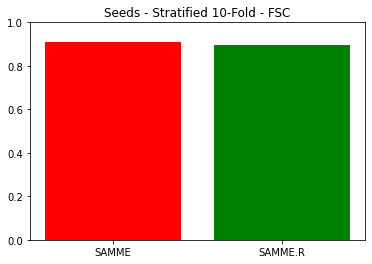

In [67]:
print("=== Stratified K-Fold ===")
cross_validator = StratifiedKFold
accs = {}
precs = {}
recs = {}
fscrs = {}

for fold_num in fold_nums:
    folds = cross_validator(n_splits=fold_num)
    print('K =', fold_num)
    for algorithm in algorithms:
        classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), algorithm=algorithm)
        y_pred = boost_for_params(data_X, data_y, classifier, folds)
        
        accs[algorithm] = utils.get_accuracy(data_y, y_pred)
        precs[algorithm] = utils.get_precision(data_y, y_pred)
        recs[algorithm] = utils.get_recall(data_y, y_pred)
        fscrs[algorithm] = utils.get_FSC(data_y, y_pred)
        
        if tex:
            # to .tex table
            print('  ', algorithm, '&', accs[algorithm], '&', precs[algorithm], \
                  '&', recs[algorithm], '&', fscrs[algorithm], '\\\\')
            #print('  ', algorithm, '&', fscrs[algorithm], '\\\\')
        else:
            print('\tAlgorithm =', algorithm, 'FSC =', fscrs[algorithm])
        
    utils.bar_plot('{} - Stratified {}-Fold - Accuracy'.format(ds_name, fold_num), accs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Precision'.format(ds_name, fold_num), precs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - Recall'.format(ds_name, fold_num), recs, out_path=out_path, to_file='algorithm', show=show_plots)
    utils.bar_plot('{} - Stratified {}-Fold - FSC'.format(ds_name, fold_num), fscrs, out_path=out_path, to_file='algorithm', show=show_plots, save=True)

In [69]:
ds_name

'Seeds'